In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
hw_class = pd.read_csv('eng_tickets_hw_class.csv')
hw_class=hw_class[['eng_hardware','predictions']]
hw_class.head()

,eng_hardware,predictions
0,DV07,DV04
1,AOS TB,AOS TB
2,DA51,DA49
3,DV15,DV15
4,DA56,DV23


In [5]:
hw_conf=hw_class[['eng_hardware','predictions']]
hw_conf.head(20)

,eng_hardware,predictions
0,DV07,DV04
1,AOS TB,AOS TB
2,DA51,DA49
3,DV15,DV15
4,DA56,DV23
5,DA65,DA65
6,PM03,PM03
7,DV15,DV15
8,CM05,NaN
9,DA62,DA52


In [6]:
#hw_conf['pred_rename']=hw_conf['predictions'].where()

p = ~(hw_conf.predictions.isin(['AOS ACA Corr Room','DV04','AOS','AOS BL Corr Room','DV10','CM11','DV02','DA64','AOS LO Room','DA62']))
hw_conf.loc[p, 'predictions'] = 'Other HW'

h = ~(hw_conf.eng_hardware.isin(['AOS ACA Corr Room','DV04','AOS','AOS BL Corr Room','DV10','CM11','DV02','DA64','AOS LO Room','DA62']) )
hw_conf.loc[h, 'eng_hardware'] = 'Other HW'

In [7]:
hw_conf

,eng_hardware,predictions
0,Other HW,DV04
1,Other HW,Other HW
2,Other HW,Other HW
3,Other HW,Other HW
4,Other HW,Other HW
...,...,...
7516,Other HW,Other HW
7517,Other HW,DV10
7518,Other HW,AOS ACA Corr Room
7519,Other HW,Other HW


# Confusion Matrix

In [8]:
y_true = hw_conf['eng_hardware'].to_list()
y_pred = hw_conf['predictions'].to_list()


In [9]:
np.unique(y_pred)

array(['AOS', 'AOS ACA Corr Room', 'AOS LO Room', 'CM11', 'DA62', 'DA64',
       'DV02', 'DV04', 'DV10', 'Other HW'], dtype='<U17')

In [10]:
np.unique(y_true)

array(['AOS', 'AOS ACA Corr Room', 'AOS LO Room', 'CM11', 'DA62', 'DA64',
       'DV02', 'DV04', 'DV10', 'Other HW'], dtype='<U17')

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

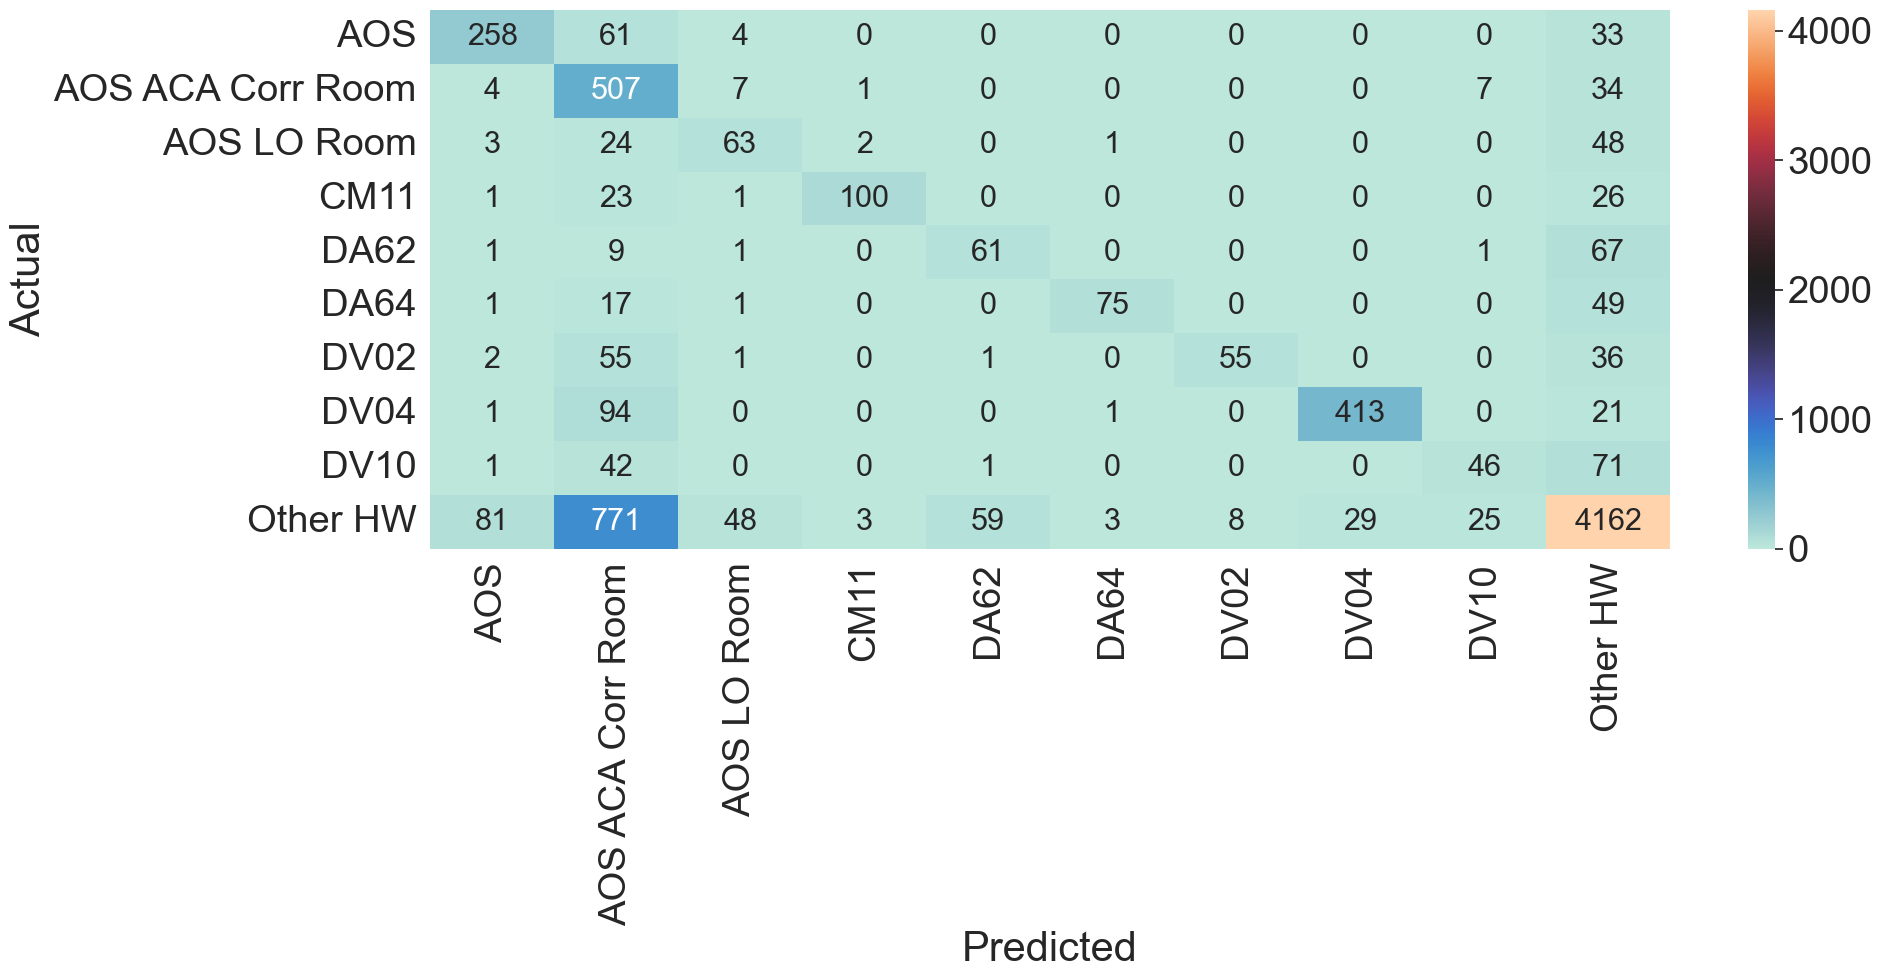

In [16]:
data = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (20,7))
sn.set(font_scale=2.5)#for label size
sn.heatmap(df_cm, cmap="icefire", annot=True,annot_kws={"size": 22}, fmt='g')# font size